# Import Modules

In [89]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

In [90]:
# Warnings are ignored in the following for better readability
import warnings
warnings.filterwarnings('ignore')

# Import Datasets

In [91]:
redwine = pd.read_csv("winequality-red (1).csv", delimiter=';')
whitewine = pd.read_csv("winequality-white (2).csv", delimiter=';')

# Dataset Information 

In [92]:
redwine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


# Exploratory Data Analysis

# Quality Counter

In [93]:
print("Redwine: " + str(Counter(redwine['quality'])))
print("Whitewine: " + str(Counter(whitewine['quality'])))

Redwine: Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})
Whitewine: Counter({6: 2198, 5: 1457, 7: 880, 8: 175, 4: 163, 3: 20, 9: 5})


<AxesSubplot:xlabel='quality', ylabel='count'>

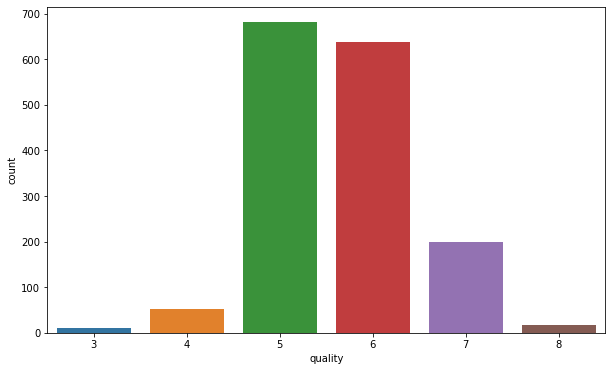

In [94]:
# Redwine
fig = plt.figure(figsize = (10,6))
x='quality'
sns.countplot(x = x, data=redwine)

<AxesSubplot:xlabel='quality', ylabel='count'>

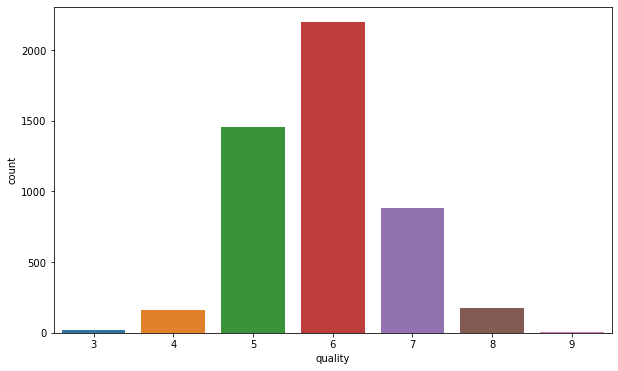

In [95]:
# Whitewine
fig = plt.figure(figsize = (10,6))
x='quality'
sns.countplot(x = x, data=whitewine)

## Distribution of the Dataset - Barplots of all Attributes

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

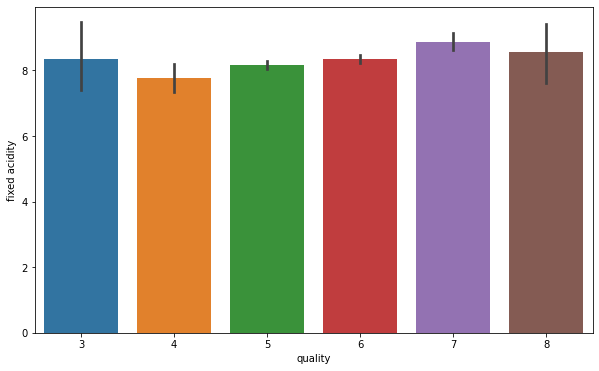

In [96]:
fig = plt.figure(figsize = (10,6))
x = 'quality'
y = 'fixed acidity'
sns.barplot(x = x, y = y, data = redwine)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

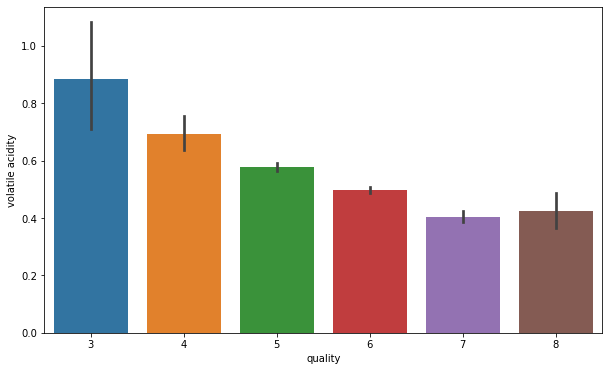

In [97]:
fig = plt.figure(figsize = (10,6))
x = 'quality'
y = 'volatile acidity'
sns.barplot(x = x, y = y, data = redwine)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

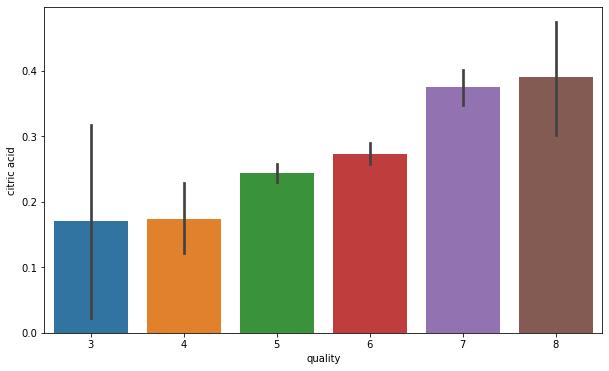

In [98]:
fig = plt.figure(figsize = (10,6))
x = 'quality'
y = 'citric acid'
sns.barplot(x = x, y = y, data = redwine)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

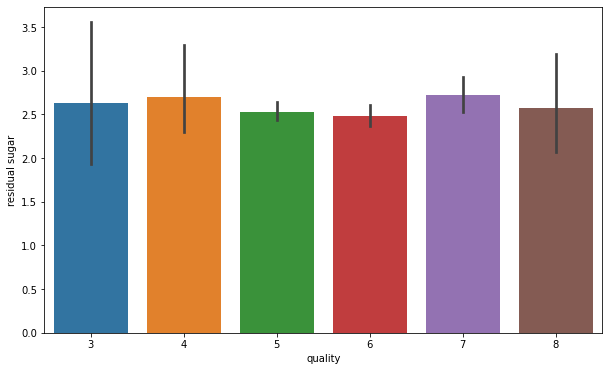

In [99]:
fig = plt.figure(figsize = (10,6))
x = 'quality'
y = 'residual sugar'
sns.barplot(x = x, y = y, data = redwine)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

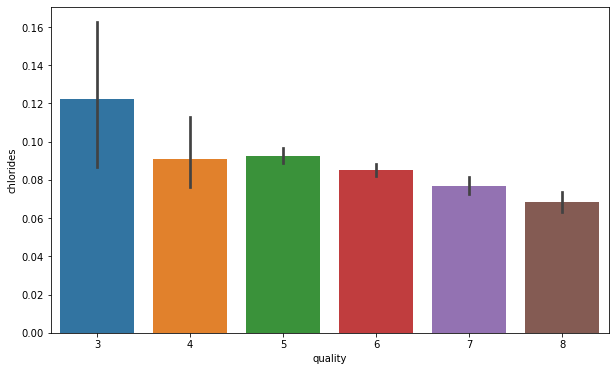

In [100]:
fig = plt.figure(figsize = (10,6))
x = 'quality'
y = 'chlorides'
sns.barplot(x = x, y = y, data = redwine)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

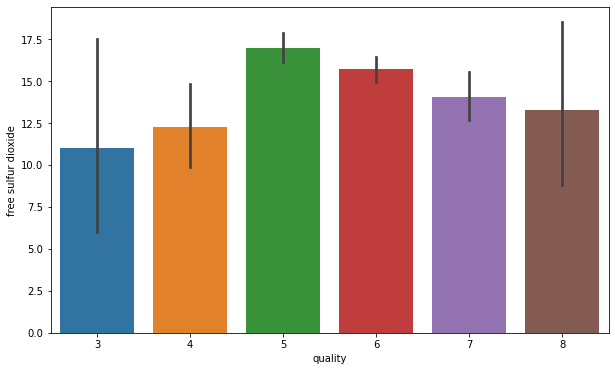

In [101]:
fig = plt.figure(figsize = (10,6))
x = 'quality'
y = 'free sulfur dioxide'
sns.barplot(x = x, y = y, data = redwine)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

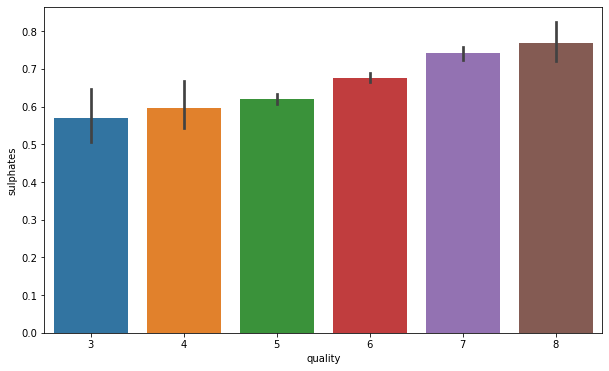

In [102]:
fig = plt.figure(figsize = (10,6))
x = 'quality'
y = 'sulphates'
sns.barplot(x = x, y = y, data = redwine)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

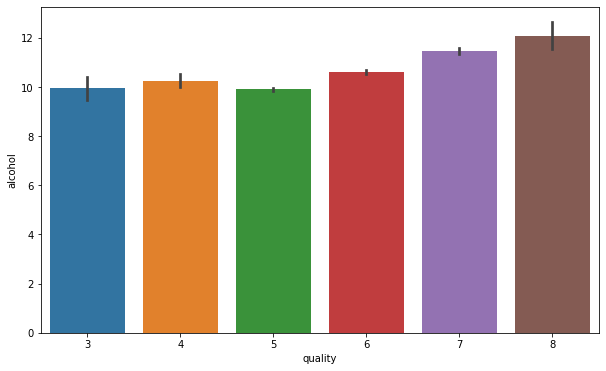

In [103]:
fig = plt.figure(figsize = (10,6))
x = 'quality'
y = 'alcohol'
sns.barplot(x=x, y=y , data = redwine)

<AxesSubplot:xlabel='quality', ylabel='density'>

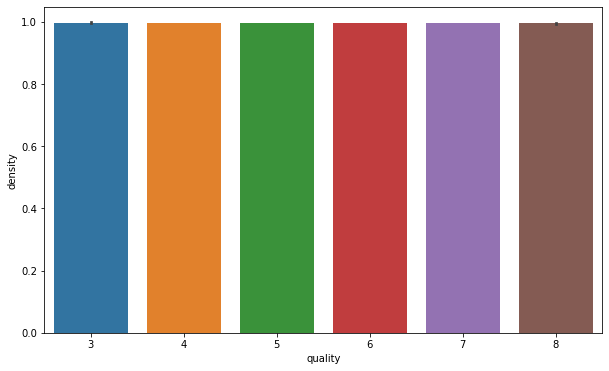

In [104]:
fig = plt.figure(figsize = (10,6))
x = 'quality'
y = 'density'
sns.barplot(x = x, y = y, data = redwine)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

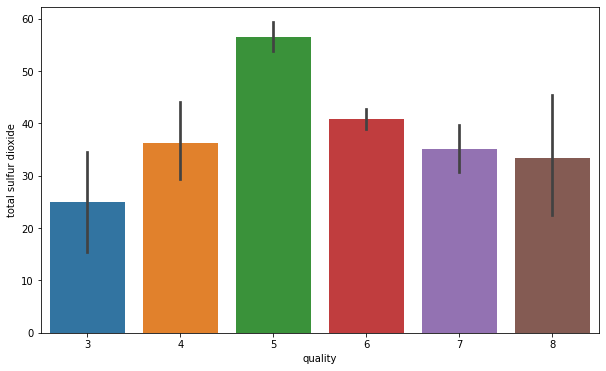

In [105]:
fig = plt.figure(figsize = (10,6))
x = 'quality'
y = 'total sulfur dioxide'
sns.barplot(x = x, y = y, data = redwine)

<AxesSubplot:xlabel='quality', ylabel='pH'>

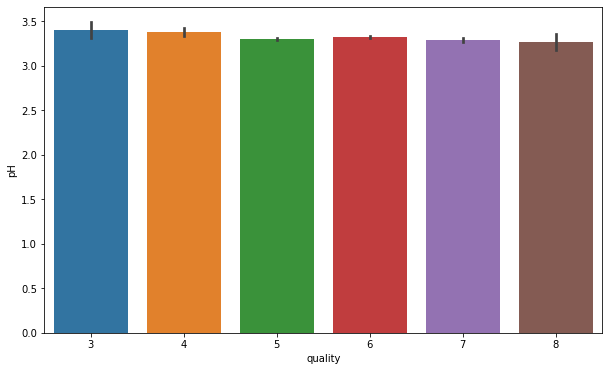

In [106]:
fig = plt.figure(figsize = (10,6))
x = 'quality'
y = 'pH'
sns.barplot(x = x, y = y, data = redwine)

# Correlation

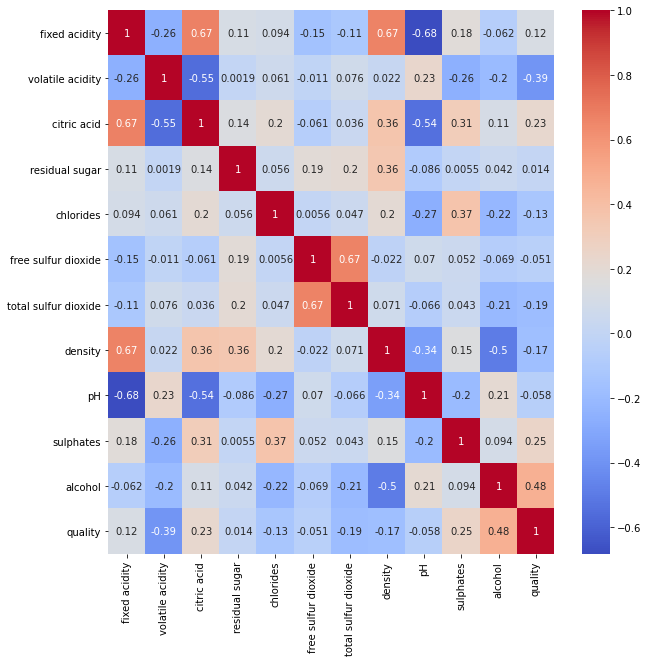

In [107]:
# For Redwine
plt.figure(figsize=(10, 10))
sns.heatmap(redwine.corr(), annot=True, cmap='coolwarm')
plt.show()

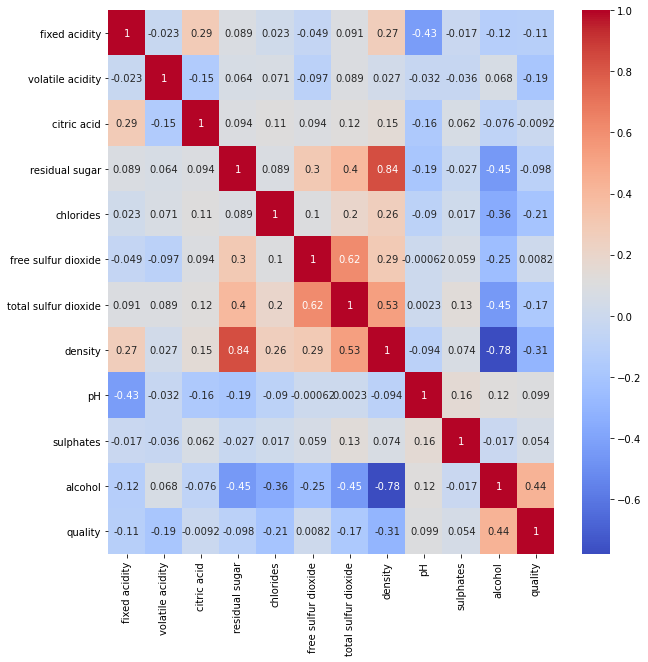

In [108]:
#For Whitewine
plt.figure(figsize=(10, 10))
sns.heatmap(whitewine.corr(), annot=True, cmap='coolwarm')
plt.show()

# Model Prediction with all classes

## Random Forest 

In [109]:
# define Attributes x and target attribute y
x = redwine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'sulphates', 'alcohol']]
y = redwine['quality']

# Split Data into Training and Test Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

# ML-Algorithm Random Forest (rf) and print out accuracy
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_acc_score*100)

65.5


# Model Prediction with 3 classes

<AxesSubplot:xlabel='quality', ylabel='count'>

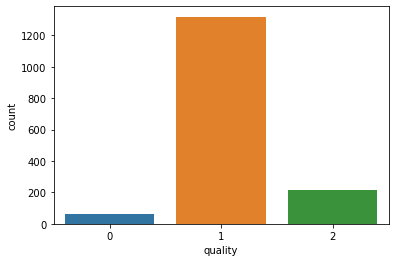

In [110]:
# Reduce the number of classes into three: Class 0: bad Quality; Class 1: Medium Quality; Class 2: Good Quality
redwine_3 = redwine.copy()
redwine_3['quality'] = redwine_3['quality'].apply(lambda x: 0 if x <= 4 else 1 if x <= 6 else 2)
sns.countplot(x='quality', data=redwine_3)

<AxesSubplot:xlabel='quality', ylabel='count'>

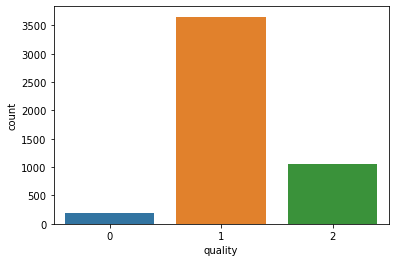

In [111]:
# same with whitewine
whitewine_3 = whitewine.copy()
whitewine_3['quality'] = whitewine_3['quality'].apply(lambda x: 0 if x <= 4 else 1 if x <= 6 else 2)
sns.countplot(x='quality', data=whitewine_3)

In [112]:
# Count the exact numbers of each class for further use of class weights
print("Redwine: " + str(Counter(redwine_3['quality'])))
print("Whitewine: " + str(Counter(whitewine_3['quality'])))

Redwine: Counter({1: 1319, 2: 217, 0: 63})
Whitewine: Counter({1: 3655, 2: 1060, 0: 183})


# Train and Test Data

In [171]:
# Split Data into Train and Test Data for all the following ML-Models (with Reduced Attributes)
x = redwine_3[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'sulphates', 'alcohol']]
y = redwine_3['quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [114]:
# for comparison, the split, only with all attributes
"x = redwine_3[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]"
"y = redwine_3['quality']"

"y = redwine_3['quality']"

# Random Forest

In [181]:
class_weights = {
    0: 1 / 63,
    1: 1 / 1319,
    2: 1 / 217 
}

rf = RandomForestClassifier(class_weight=class_weights)
rf.fit(x_train, y_train)
rf_predict = rf.predict(x_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_acc_score * 100)

86.0


## Logistic Regression

In [182]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)

lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(lr_acc_score * 100)

82.0


## Support Vector Classifier

In [183]:
svm_model = SVC()

svm_model.fit(x_train, y_train)
svm_predict = svm_model.predict(x_test)
svm_conf_matrix = confusion_matrix(y_test, svm_predict)
svm_acc_score = accuracy_score(y_test, svm_predict)
print(svm_acc_score*100)


82.5


## KNeighborsClassifier

In [184]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

knn_model = KNeighborsClassifier()

knn_model.fit(x_train, y_train)
knn_predict = knn_model.predict(x_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predict)
knn_acc_score = accuracy_score(y_test, knn_predict)
print(knn_acc_score*100)

82.0


 ## xgboost 


In [194]:
class_weights = {
    0: 1 / 63,
    1: 1 / 1319,
    2: 1 / 217 
}

xgb_model = xgb.XGBClassifier(class_weights=class_weights)

xgb_model.fit(x_train, y_train)
xgb_predict = xgb_model.predict(x_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predict)
xgb_acc_score = accuracy_score(y_test, xgb_predict)
print(xgb_acc_score*100)

[12:40:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "class_weights" } are not used.

84.75


## Naive Bayes

In [187]:
naive_bayes = GaussianNB()

naive_bayes.fit(x_train,y_train)
naive_bayes_predict = naive_bayes.predict(x_test)
naive_bayes_conf_matrix = confusion_matrix(y_test, naive_bayes_predict)
naive_bayes_acc_score = accuracy_score(y_test, naive_bayes_predict)
print(naive_bayes_acc_score*100)


79.5


## Stochastic Gradient Descent


In [189]:
sgd = SGDClassifier(penalty=None)
sgd.fit(x_train, y_train)

sgd_predict = sgd.predict(x_test)
sgd_conf_matrix = confusion_matrix(y_test, sgd_predict)
sgd_acc_score = accuracy_score(y_test, sgd_predict)
print(sgd_acc_score*100)


76.0


# Results (Model Prediction 3 Classes)

## Redwine

In [190]:
# Print Results of Accuracy of all Models into a table -> Random Forest is the best
results = pd.DataFrame({
    'Redwine-Model': ['Random Forest', 'Logistic Regression', 'SVM', 'KNN', 'Naive Bayes', 'Gradient Descent', "XGBoost"],
    'Score': [rf_acc_score * 100, lr_acc_score * 100, svm_acc_score * 100, knn_acc_score * 100, naive_bayes_acc_score * 100, sgd_acc_score * 100, xgb_acc_score*100]
})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')

result_df

,Redwine-Model
Score,
86.0,Random Forest
84.5,XGBoost
82.5,SVM
82.0,Logistic Regression
82.0,KNN
79.5,Naive Bayes
76.0,Gradient Descent


## Whitewine

In [191]:
#Same For Whitewine [Models for Whitewine are in another file]
results = pd.DataFrame({
    'Whitewine-Model': ['Random Forest', 'Logistic Regression', 'SVM', 'KNN', 'Naive Bayes', 'Gradient Descent', 'XGBoost'],
    'Score': [84.326531, 76.081633, 76.244898,75.428571, 67.020408, 73.877551,84]
})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')

result_df

,Whitewine-Model
Score,
84.326531,Random Forest
84.000000,XGBoost
76.244898,SVM
76.081633,Logistic Regression
75.428571,KNN
73.877551,Gradient Descent
67.020408,Naive Bayes


# Final Model: Random Forest

In [156]:
# Redwine - Final Model
from sklearn.metrics import f1_score

x = redwine_3[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'sulphates', 'alcohol']]
y = redwine_3['quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=299)

class_weights = {
    0: 1 / 63,
    1: 1 / 1319,
    2: 1 / 217
}

red = RandomForestClassifier(class_weight=class_weights)
red.fit(x_train, y_train)
rf_predict = red.predict(x_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_f1_score = f1_score(y_test, rf_predict, average='weighted')
print(rf_f1_score * 100)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_acc_score*100)


86.32282913165267
88.75


In [163]:
# Whitewine Final Model
x = whitewine_3[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'sulphates', 'alcohol']]
y = whitewine_3['quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,random_state=242)

class_weights = {
    0: 1 / 183,
    1: 1 / 3655,
    2: 1 / 1060    
}

white = RandomForestClassifier()
white.fit(x_train, y_train)
rf_predict=white.predict(x_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_f1_score = f1_score(y_test, rf_predict, average='weighted')
print(rf_f1_score * 100)

81.654719511375


## Random Forest - prediction

In [193]:
redWhite = input("Geben Sie weiß für Weißwein und rot für Rotwein ein: ")

if redWhite == "weiß" or redWhite == "white": # User wants to predict Whitewine
    print("Qualitätsanalyse für Weißwein")
    example_data = []
    values = input("Bitte geben Sie die Werte für den Array ein, getrennt durch Kommas: ")
    values_list = values.split(',')
    if len(values_list) != 8:
        print("Fehler: Es müssen genau 8 Werte eingegeben werden!")
    else:
        try:
            example_data.append([float(value) for value in values_list])
            print("Folgende Eingabe erfolgreich:")
            print(example_data)
        except ValueError:
            print("Fehler: Ungültige Eingabe! Es dürfen nur Zahlen eingegeben werden.")
    predicted_class = white.predict(example_data)
    print(predicted_class)
elif redWhite == "rot" or redWhite == "red": # User wants to predict Redwine
    print("Qualitätsanalyse für Rotwein")
    example_data = []
    values = input("Bitte geben Sie die Werte für den Array ein, getrennt durch Kommas: ")
    values_list = values.split(',')
    if len(values_list) != 8:
        print("Fehler: Es müssen genau 8 Werte eingegeben werden!")
    else:
        try:
            example_data.append([float(value) for value in values_list])
            print("Folgende Eingabe erfolgreich:")
            print(example_data)
        except ValueError:
            print("Fehler: Ungültige Eingabe! Es dürfen nur Zahlen eingegeben werden.")
    predicted_class = red.predict(example_data)
    print(predicted_class)

Geben Sie weiß für Weißwein und rot für Rotwein ein: rot
Qualitätsanalyse für Rotwein
Bitte geben Sie die Werte für den Array ein, getrennt durch Kommas: 8.847005,0.405530,0.376498,2.708756,0.075912,34.889401,0.743456,11.518049 
Folgende Eingabe erfolgreich:
[[8.847005, 0.40553, 0.376498, 2.708756, 0.075912, 34.889401, 0.743456, 11.518049]]
[2]


In [167]:
"""""
7.871429,0.724206,0.173651,2.684921,0.09573,34.444444,0.592222,10.215873    # Rot 0
8.254284,0.538560,0.258264,2.503867,0.088973,48.946929,0.647263,10.252717   # Rot 1
8.847005,0.405530,0.376498,2.708756,0.075912,34.889401,0.743456,11.518049   # Rot 2

7.180874,0.375984,0.307705,4.821038,0.050557,130.232240,0.475956,10.173497  # Weiß 0
6.876060,0.277086,0.337877,6.797729,0.047740,142.571272,0.487557,10.269808  # Weiß 1
6.725142,0.265349,0.326057,5.261509,0.038160,125.245283,0.500142,11.416022  # Weiß 2
"""""

'""\n7.871429,0.724206,0.173651,2.684921,0.09573,34.444444,0.592222,10.215873    # Rot 0\n8.254284,0.538560,0.258264,2.503867,0.088973,48.946929,0.647263,10.252717   # Rot 1\n8.847005,0.405530,0.376498,2.708756,0.075912,34.889401,0.743456,11.518049   # Rot 2\n\n7.180874,0.375984,0.307705,4.821038,0.050557,130.232240,0.475956,10.173497  # Weiß 0\n6.876060,0.277086,0.337877,6.797729,0.047740,142.571272,0.487557,10.269808  # Weiß 1\n6.725142,0.265349,0.326057,5.261509,0.038160,125.245283,0.992412,11.416022  # Weiß 2\n'

# Best Random State

In [ ]:
""""
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

x = redwine_3[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'sulphates', 'alcohol']]
y = redwine_3['quality']

best_random_state = None
best_accuracy = 0.0

for random_state in range(301):
    print(random_state)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=random_state)

    class_weights = {
        0: 1 / 63,
        1: 1 / 1319,
        2: 1 / 217 
    }

    red = RandomForestClassifier(class_weight=class_weights)
    red.fit(x_train, y_train)
    rf_predict = red.predict(x_test)
    rf_acc_score = accuracy_score(y_test, rf_predict)
    
    if rf_acc_score > best_accuracy:
        best_accuracy = rf_acc_score
        best_random_state = random_state

print("Best RandomState:", best_random_state)
print("Best Accuracy:", best_accuracy * 100)
""""

# Test with Hyperparameters, but worse results

In [154]:
"""""
from "sklearn.model_selection import GridSearchCV

x = redwine_3[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'sulphates', 'alcohol']]
y = redwine_3['quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=299)

class_weights = {
    0: 1 / 63,
    1: 1 / 1319,
    2: 1 / 217 
}

param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 15]
}

red = RandomForestClassifier(class_weight=class_weights)
grid_search = GridSearchCV(estimator=red, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_red = grid_search.best_estimator_
rf_predict = best_red.predict(x_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_f1_score = f1_score(y_test, rf_predict, average='weighted')
print(rf_f1_score * 100)""""

86.22004508409918
